In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
pip install xlrd

In [11]:
df=pd.read_excel(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\Concrete_Data.xls")

In [15]:
df.head(2)

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [14]:
df.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [13]:
df.shape

(1030, 9)

In [21]:
df.duplicated().sum()

np.int64(0)

In [20]:
df=df.drop_duplicates()

In [22]:
df.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

## EDA

Train test split

In [23]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1)
y = df["strength"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

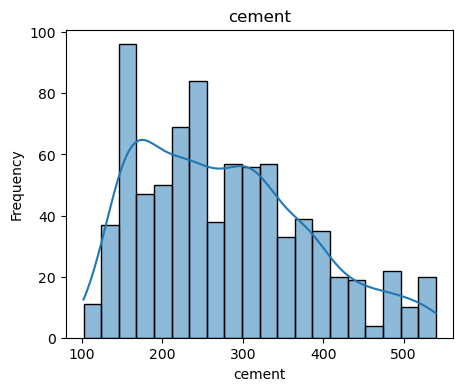

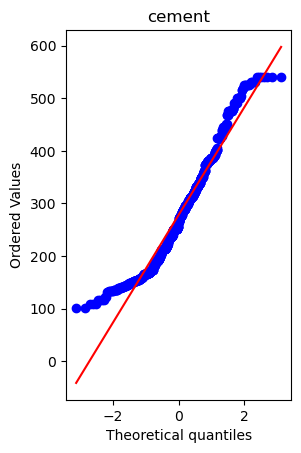

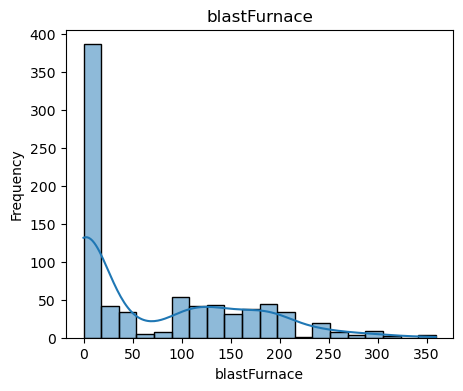

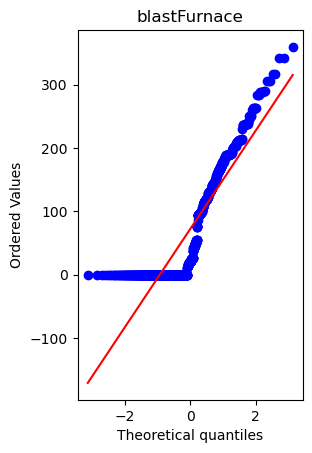

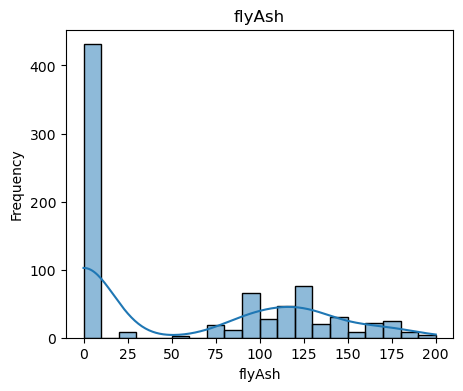

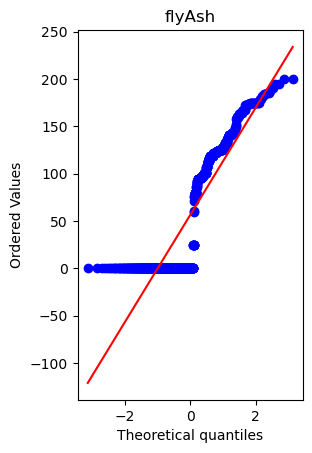

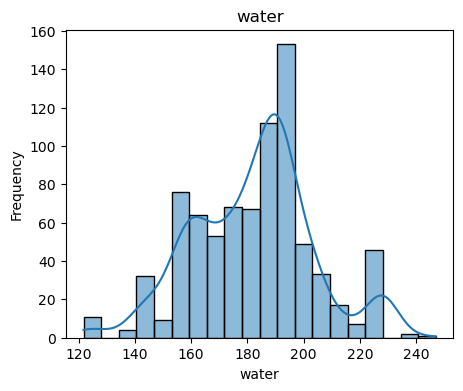

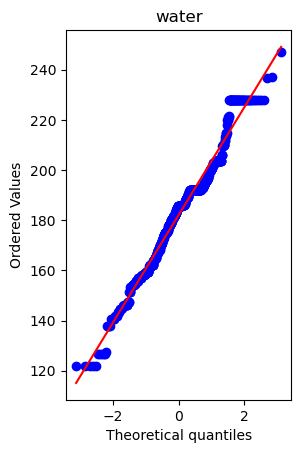

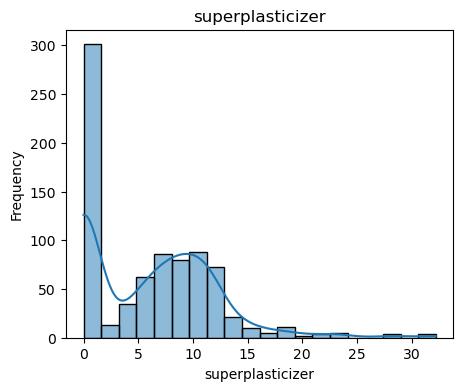

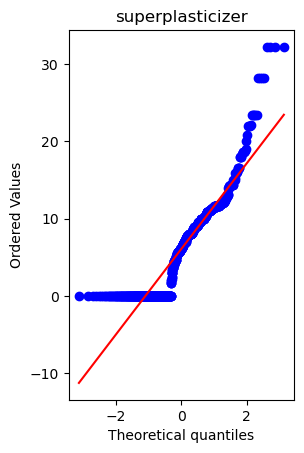

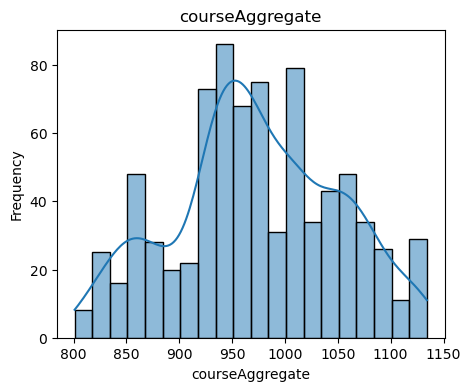

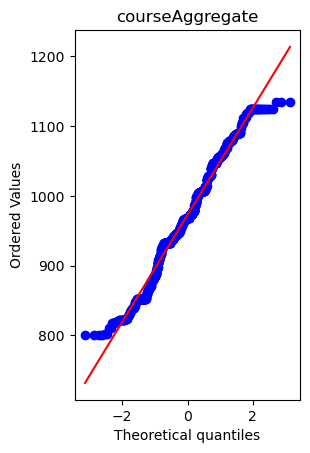

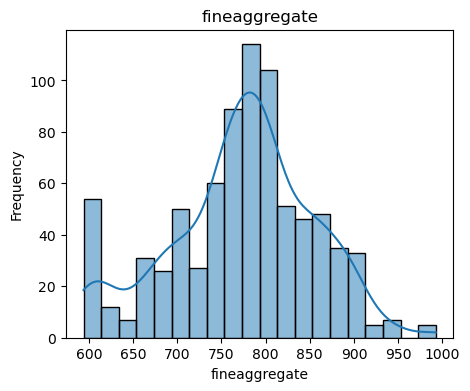

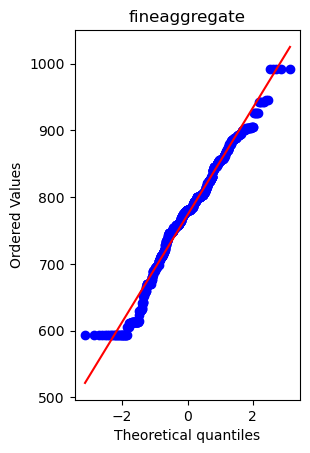

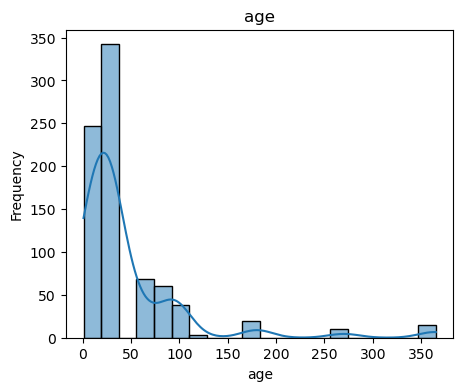

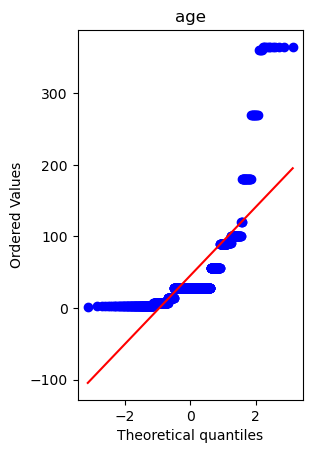

In [30]:
for col in X_train.columns:
    plt.figure(figsize=(5,4))
    # plt.Subplot(1,2,1)
    sns.histplot(X_train[col],kde=True,bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


        # QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

# Apllying powerTransformer

What is powertransfomer in machine learning?

Ans:

Power transformation is a family of data transformations that are applied to make the data more Gaussian-like or more symmetric. This can be useful for certain statistical methods that assume normally distributed data, such as linear regression.

Types:

Yeo-Johnson & Box-Cox

is a generalization of Box-Cox that allows for transformation of both positive and negative values. PowerTransformer can be used as a preprocessing step in a machine learning pipeline to improve the performance of models that are sensitive to the distribution of the data.